In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from glob import glob
import os 
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:
#resize the images
img_width= 64
img_height = 64
folder = glob('C:/Users/rakes/Desktop/Malaria_prediction/Train/*')

In [5]:
train= 'C:/Users/rakes/Desktop/Malaria_prediction/Train/'
test = 'C:/Users/rakes/Desktop/Malaria_prediction/Test/'

In [5]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.summary()

NameError: name 'Sequential' is not defined

In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

train_datagen = datagen.flow_from_directory('C:/Users/rakes/Desktop/Malaria_prediction/Train/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
test_set = datagen.flow_from_directory('C:/Users/rakes/Desktop/Malaria_prediction/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [19]:
history = model.fit_generator(generator= train_datagen, 
                   steps_per_epoch=len(train_datagen),
                   epochs = 10,
                   validation_data= test_set,
                   validation_steps=len(test_set)) 

Epoch 1/10
13/13 [==============================] - 8s 633ms/step - loss: 3.8450 - accuracy: 0.5457 - val_loss: 0.7507 - val_accuracy: 0.3134
Epoch 2/10
13/13 [==============================] - 8s 622ms/step - loss: 0.7961 - accuracy: 0.5168 - val_loss: 0.6939 - val_accuracy: 0.6418
Epoch 3/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6808 - accuracy: 0.6106 - val_loss: 0.6955 - val_accuracy: 0.6791
Epoch 4/10
13/13 [==============================] - 8s 633ms/step - loss: 0.6731 - accuracy: 0.5986 - val_loss: 0.6721 - val_accuracy: 0.6642
Epoch 5/10
13/13 [==============================] - 8s 624ms/step - loss: 0.6480 - accuracy: 0.6442 - val_loss: 0.6474 - val_accuracy: 0.6269
Epoch 6/10
13/13 [==============================] - 9s 666ms/step - loss: 0.6129 - accuracy: 0.6659 - val_loss: 0.7343 - val_accuracy: 0.3657
Epoch 7/10
13/13 [==============================] - 8s 640ms/step - loss: 0.5927 - accuracy: 0.6635 - val_loss: 0.6548 - val_accuracy: 0.6343
Epoch 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


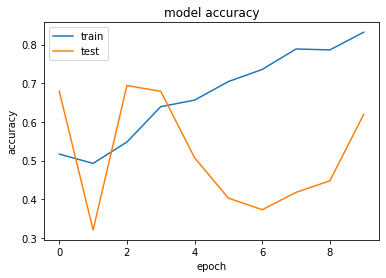

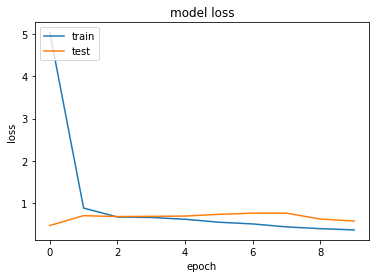

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()